###  TITANIC
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Practice Skills
Binary classification and Python

https://www.kaggle.com/c/titanic

__Partie 1:__ Description des donnés  
__Partie 2:__ Modification du dataset pour le préparer pour les algo (trouver nom + classe)  
__partie 3:__ Algo  
__partie 4:__ Présentation des résultats  

# imports

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 3300)
pd.set_option('display.max_rows', 100)


from IPython.display import Image
#pd.set_option('display.max_colwidth', 100)
#pd.set_option('display.width', 200)
#pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows', 40)


In [112]:
filename = "train.csv"
#path = "/Users/kaiim/Downloads/titanic/"
## path with docker
path = "/home/jovyan/work/"
import_text = pd.read_csv(path+filename)
train = pd.DataFrame(import_text)
copy_train = train

# 1 - Présentation des données

In [6]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1-1 - Descriptions des donées 
>__PassengerId__ : numéro du passager  __(int)__  
__Survived__ : survécu = 1, Non survécu = 0  __(int)__  
__Pclass__ : Catégorie du billet (1er, 2eme ou 3eme class) __(int)__  
__Name__ : Nom de la personne __(string)__   
__Sex__ : Homme ou Femme __(string)__  
__SibSp__ : Si il y a des frère, soeur, demi-frère, demi-soeur, époux, épouse. (les maîtresses et les fiancées ont été ignorées) __(int)__  
__Parch__ : Parent = mère, père. Enfant = fille, fils, belle-fille, beau-fils. Certains enfants voyageaient uniquement avec une nourrice, donc parch = 0 pour eux.  __(int)__  
__Ticket__ : Numéro du ticket __(string)__  
__Fare__ : Prix du billet  __(int)__  
__Cabin__ : Numéro de cabine  __(string)__  
__Embarked__ : Point d'entrée lors de l'embarquement  __(string)__

Dans le dataframe, il y a 890 lignes pour 12 collonnes.

In [7]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nous pouvons voir que dans la colonne "age" il y a des valeurs nulle

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 2-2 Normalisation de la colo Name
Nous allons normaliser tout d'abord la colonne des noms pour harmoniser les titres mr, mrs etc etc ..

In [118]:
train = copy_train
train["Title"] = ""
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,


In [119]:
s = []
for dataset in train["Name"]:
    s.append(pd.Series(dataset).str.extract(r' ([A-Za-z]+)\.', expand=False))
train["Title"] = s
train["Title"] = train["Title"].map(lambda name:name.to_string().replace("0   ", "").split(' ', 2)[1])

In [120]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Countess      1
Ms            1
Capt          1
Sir           1
Mme           1
Jonkheer      1
Don           1
Name: Title, dtype: int64

In [121]:
Title_Dict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [122]:
train['Title'] = train.Title.map(Title_Dict)
train["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

D'autres test auraient pu etre faits pour trouver les incoherence plus subtils. Par exemple regarder qu'il y a bien des ecarts d'age pour des meme nom de familles (). Ou des erreurs d'orthographes (Utiliser pour cela l'algo de leventsein pour calculer les distances). Regarder les liens de familles et verifier que les personnes etaient bien presentes (faire une fonction de trie par famille puis par no; avec un str compare, ou isoler les nom de famille)
j'ai la flemme de le faire la :)

### 2-2 Etude des colonnes Age et Cabin

In [132]:
x = empty_age.isnull().sum()
x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          158
Embarked         0
Title            0
dtype: int64

Le but étant de savoir si on :
- efface les donées manquante (si > 20% des données)
- remplace les données manquante (moyenne, médiane, etc etc)
- Création d'un algo qui va segmenter les parties atribuer les valeurs (attention à na pas induire le dataset en erreur)

In [123]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*_RA3mCS30Pr0vUxbp25Yxw.png")

Ce shemas indique la maiere dont nous pouvons essayer de traiter les donnes a analyser. 
dans notre cas nous pouvons essayer les multiples imputations en essaayant de segmenter au mieux la donne pour la remplacer par des medianne de sous groupe. Nous avons aussi la regression logistic (par exemple la methode KNN pour affiner au mieux les resultats).

Nous allons voir la repartition entre les femmes et hommes pour remplacer potentiellement les valeurs nulles 
d'Age des femmes par la médianne des femme et pareil pour les hommes

In [124]:
empty_age = train[train["Age"].isnull()]
empty_age.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr


#### Répartition du nombre de femmes et hommes dans les données manquantes

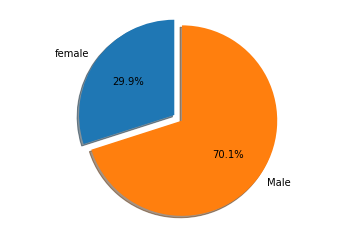

In [134]:
len_femme = len(empty_age[empty_age["Sex"] == "female"])
len_homme = len(empty_age[empty_age["Sex"] == "male"])
name = ['female', 'Male']
data = [len_femme, len_homme]
explode=(0, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

70% Des données manquantes proviennent majoritairement d'hommmes. Nous allons étudier la distribution des données des hommes et femmes.

#### Répartition des personnes en fonction d'embarquement

In [135]:
empty_age["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

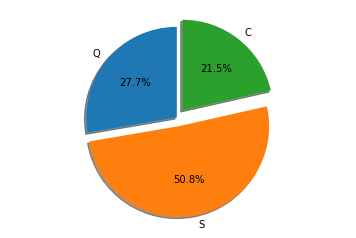

In [136]:
Q_embarked = len(empty_age[empty_age["Embarked"] == "Q"])
s_embarked = len(empty_age[empty_age["Embarked"] == "S"])
C_embarked = len(empty_age[empty_age["Embarked"] == "C"])

name = ['Q', 'S', 'C']
data = [Q_embarked, s_embarked, C_embarked]
explode=(0, 0.10, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

#### Répartition des personnes en fonction de la class

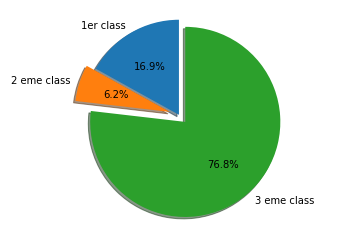

In [129]:
class_one = len(empty_age[empty_age["Pclass"] == 1])
class_two = len(empty_age[empty_age["Pclass"] == 2])
class_three = len(empty_age[empty_age["Pclass"] == 3])

name = ['1er class', '2 eme class', "3 eme class"]
data = [class_one, class_two, class_three]
explode=(0, 0.10, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

les camember en cercle n'étant pas égale en valeurs. Nous allons utiliser la médiane pour "Pclass", "Sex", "Embarked" mais aussi "Title", cela, Afin d'affiner les résulat de manire plus precise.  
Nous allons calculer la medianne en prennant ses 4 colonnes pour ensuite les attribuer aux valeurs manquantes.

In [172]:
copy = train
cop = copy.iloc[0:len(copy)].groupby(["Sex","Pclass","Embarked", "Title"]).median()
cop = cop.reset_index()[['Sex', 'Pclass', 'Title', 'Embarked','Age']]
print(cop)

       Sex  Pclass    Title Embarked    Age
0   female       1     Miss        C  30.50
1   female       1      Mrs        C  44.00
2   female       1  Royalty        C  48.00
3   female       1     Miss        Q  33.00
4   female       1     Miss        S  23.00
5   female       1      Mrs        S  39.00
6   female       1  Officer        S  49.00
7   female       1  Royalty        S  33.00
8   female       2     Miss        C  17.00
9   female       2      Mrs        C  22.50
10  female       2     Miss        Q  30.00
11  female       2     Miss        S  24.00
12  female       2      Mrs        S  33.00
13  female       3     Miss        C  11.00
14  female       3      Mrs        C  26.50
15  female       3     Miss        Q  18.50
16  female       3      Mrs        Q  35.50
17  female       3     Miss        S  19.00
18  female       3      Mrs        S  31.00
19    male       1       Mr        C  36.00
20    male       1  Officer        C  44.00
21    male       1  Royalty     

In [ ]:
train[train[] == ]
def get_tab(col):
    
cond = train[(train["Sex"] == x) & (train["Pclass"]) & (train["Embarked"]) & (train["Title"])]

In [154]:
#train["Age"].fillna(train.groupby(["Pclass", "Sex", "Embarked"])["Age"].transform("median"), inplace=True)

In [130]:
#train.groupby(["Pclass", "Sex", "Embarked"])["Age"].transform("median")
#verif = data_cpy[(data_cpy["Pclass"] == 3) & (data_cpy["Sex"] == "male" ) & (data_cpy["Embarked"] == "Q")]
#verif.head(5)

In [131]:
#verif = data_cpy[(data_cpy["Pclass"] == 3) & (data_cpy["Embarked"] == "Q")]
#verif.head(5)

In [7]:
### image = wget "https://cdn-images-1.medium.com/max/1400/1*_RA3mCS30Pr0vUxbp25Yxw.png"
### copier cela a 1-1-1 pour reprensenter les choix que nous avons pour selectionner les valeurs manquqntes

In [8]:
#########################################################################################
#########################################################################################
#########################################################################################
### AIDES

In [3]:
#male = empty_age[empty_age["Sex"] == "male"]
#femm = empty_age[empty_age["Sex"] == "femelle"]

#ax = male.plot(kind="bar", y="Age", x="Fare", figsize=(16,10), color="red")
#ax.set_title("Distribution des écarts d'âge entre mari et femme");

In [187]:
#ax = male[male["Age"]].hist(figsize=(16,6), bins=50)
#ax.set_title("Distribution des écarts d'âge entre mari et femme");

In [2]:
#Nuage de points a faire .. 
#empty_age.plot(kind='hexbin', x="age", y="age", gridsize=25, figsize=(7,6))
#ax.set_title("Heatmap - âge entre mari et femmes")

In [1]:
#def bar_chart(feature):
##    survived = train[train['Survived']==1][feature].value_counts()
#    dead = train[train['Survived']==0][feature].value_counts()
#    df = pd.DataFrame([survived,dead])
#    df.index = ['Survived','Dead']
#    df.plot(kind='bar',stacked=True, figsize=(10,5))